In [36]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [37]:
import os
train = "/content/drive/MyDrive/AI/Nhandangchitay/Train"
validation = "/content/drive/MyDrive/AI/Nhandangchitay/Validation"

In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import Flatten, MaxPooling2D
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [39]:
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [40]:
label=['BaHien','HoangBach']

In [41]:
train_generator = train_data_gen.flow_from_directory(
    train,                                         
    target_size=(150, 150),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    validation,
    target_size=(150, 150),               
    class_mode='categorical')

Found 34 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [44]:
EPOCHS=60
history=model.fit(train_generator,epochs=EPOCHS,verbose=1,
                  validation_data=validation_generator)

Epoch 1/60
2/2 [==============================] - 1s 311ms/step - loss: 0.7159 - acc: 0.3824 - val_loss: 0.7509 - val_acc: 0.5000
Epoch 2/60
2/2 [==============================] - 1s 501ms/step - loss: 0.7055 - acc: 0.5000 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 3/60
2/2 [==============================] - 1s 501ms/step - loss: 0.6915 - acc: 0.5000 - val_loss: 0.6966 - val_acc: 0.5000
Epoch 4/60
2/2 [==============================] - 1s 512ms/step - loss: 0.6873 - acc: 0.5000 - val_loss: 0.6977 - val_acc: 0.5000
Epoch 5/60
2/2 [==============================] - 1s 499ms/step - loss: 0.6886 - acc: 0.5882 - val_loss: 0.6907 - val_acc: 0.5000
Epoch 6/60
2/2 [==============================] - 1s 489ms/step - loss: 0.6892 - acc: 0.7059 - val_loss: 0.6916 - val_acc: 0.5000
Epoch 7/60
2/2 [==============================] - 1s 120ms/step - loss: 0.6881 - acc: 0.8235 - val_loss: 0.6917 - val_acc: 0.5000
Epoch 8/60
2/2 [==============================] - 1s 115ms/step - loss: 0.6860 - acc: 0.50

In [46]:
score = model.evaluate(train_generator,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  0.00034128225524909794
Độ chính xác  1.0


Saving BaHientest.jpg to BaHientest (1).jpg
[[1. 0.]]
Dự đoán chỉ tay của:  BaHien


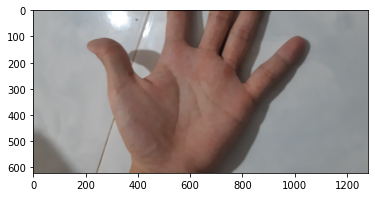

In [48]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán chỉ tay của: ', label[np.argmax(y_predict)])

Saving HoangBachtest.jpg to HoangBachtest (1).jpg
[[0. 1.]]
Dự đoán chỉ tay của:  HoangBach


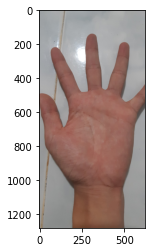

In [50]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán chỉ tay của: ', label[np.argmax(y_predict)])